In [1]:
import os.path

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import numpy as np

from scipy import stats
from scipy.spatial.distance import cosine

% matplotlib inline
import matplotlib.pyplot as plt

from collections import OrderedDict

import torchvision
from torchvision import transforms

from mnist_cnn import ConvVAE
from notmnist_cnn import *
from utils import *
from semantic_morphing import semantic_morphing
from path_mask_attribution import explain

In [2]:
DISABLE_CUDA = False

if not DISABLE_CUDA and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [3]:
dataset = NotMNIST(
    os.path.join(*'data/notMNIST_small'.split('/')),
    batch_size=32, test_size=.2, val_size=.2
)

In [4]:
model = load_model(notmnist_model(), os.path.join('models', 'notmnist.pt'), device)

model.eval()
test_accuracy = 0

with torch.no_grad():
    for X, y, label in dataset.test_loader:
        X = X.to(device); y = y.to(device)

        pred = model(X)
        test_accuracy += (torch.argmax(pred, 1) == y).sum()

test_accuracy = test_accuracy.item() / dataset.test_size

print('Test accuracy: %.3f' % test_accuracy)
print('Test error rate: %.3f' % (1 - test_accuracy))

Test accuracy: 0.937
Test error rate: 0.063


In [5]:
emb_dim = 100

vae = ConvVAE(emb_dim).to(device)
model_path = os.path.join('models', 'conv_vae_notmnist.pt')
vae.load_state_dict(torch.load(model_path))

vae = vae.eval()

In [6]:
import json

with open(os.path.join('data', 'notmnist_conv_vae_norm_means.json')) as f:
    vae.norm_means = json.load(f)
    
vae.norm_means = { int(k): v for k, v in vae.norm_means.items() }

vae.norm_means

{-1: 3.6618690490722656,
 0: 3.707939386367798,
 1: 3.436964511871338,
 2: 3.6879830360412598,
 3: 3.780972480773926,
 4: 3.3957276344299316,
 5: 3.640519618988037,
 6: 3.604188919067383,
 7: 3.79947566986084,
 8: 3.7704708576202393,
 9: 3.7994062900543213}

11877


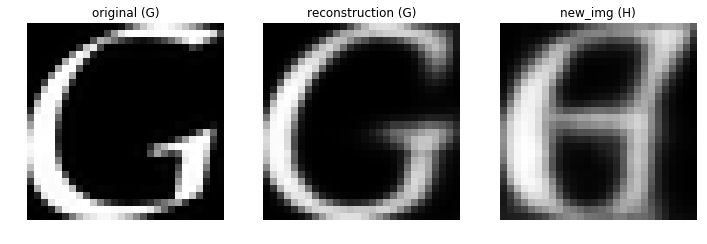

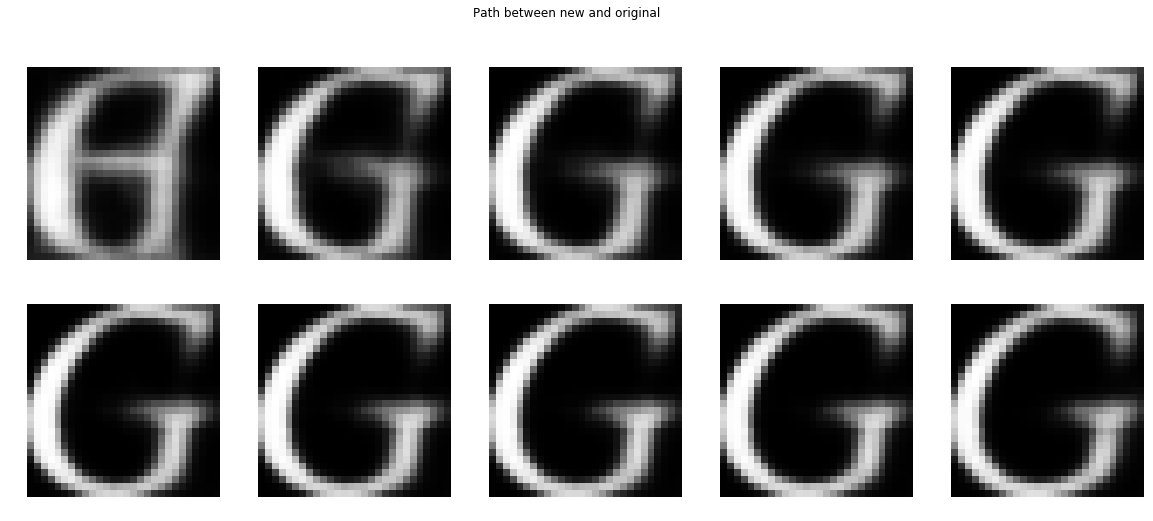

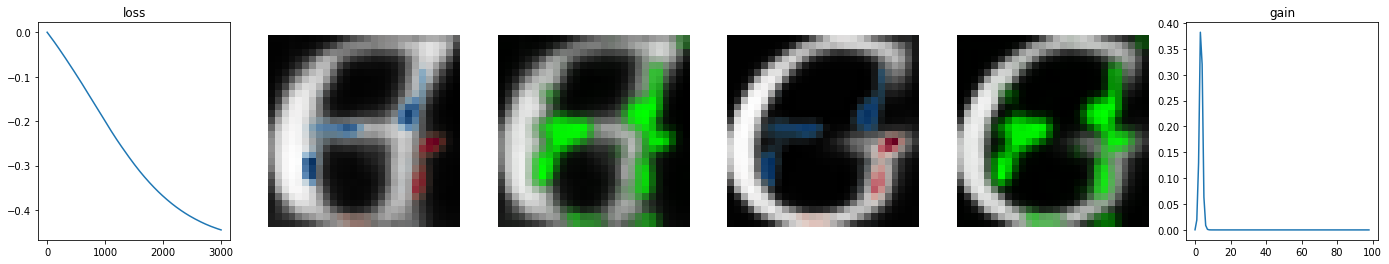

In [9]:
idx = 11877 # (G to H)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    semantic_morphing_max_iters=5000, semantic_morphing_alpha_lk=10.,
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

9120


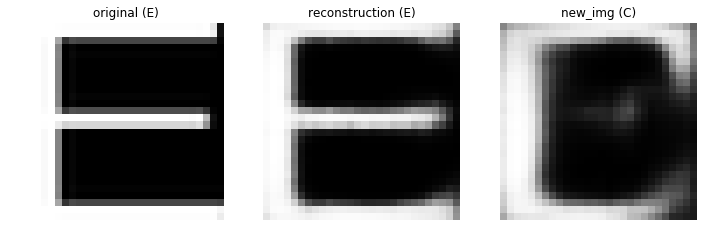

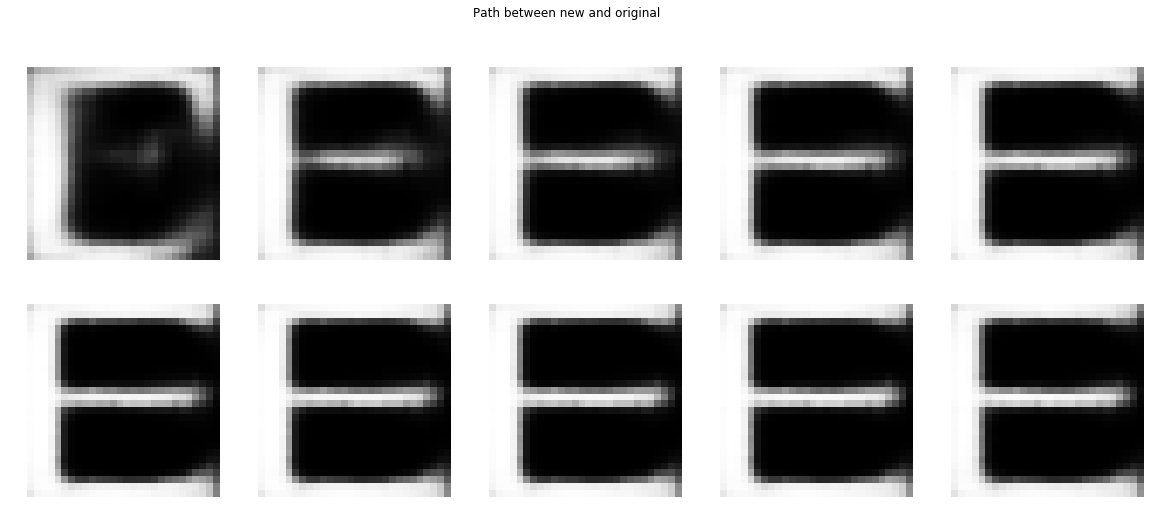

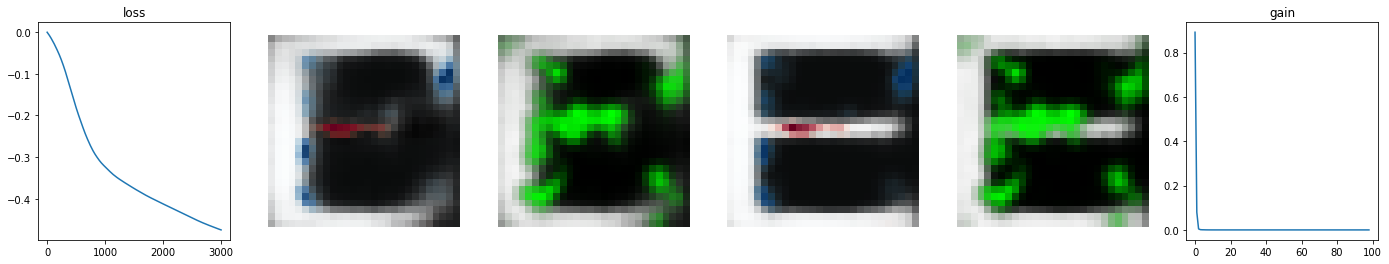

In [11]:
idx = 9120 # (E to C)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    semantic_morphing_max_iters=5000, semantic_morphing_alpha_lk=10.,
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

11356


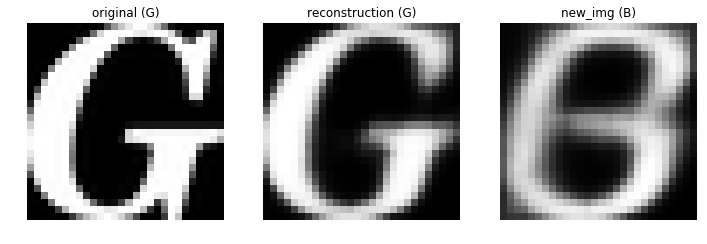

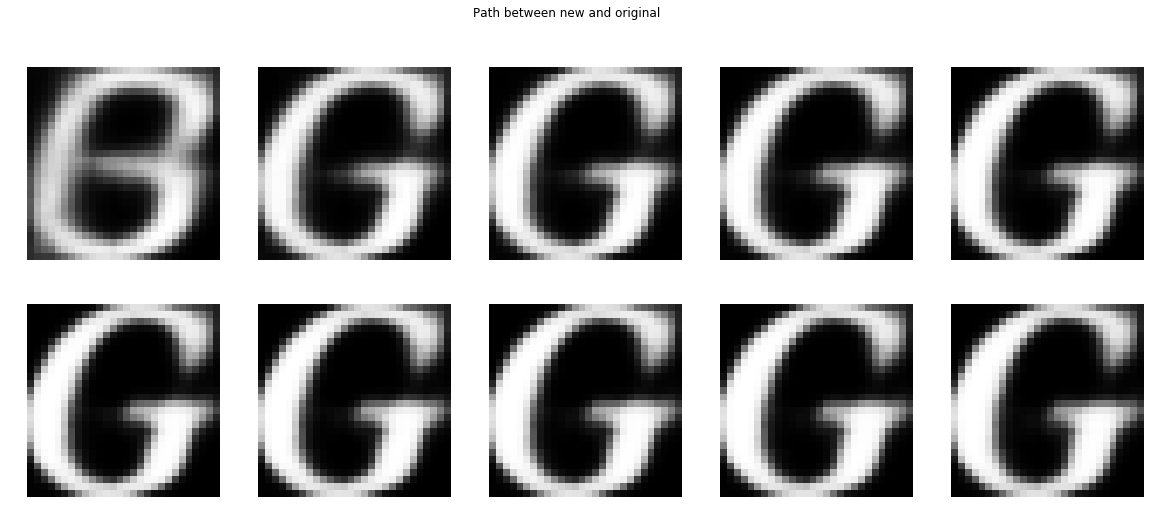

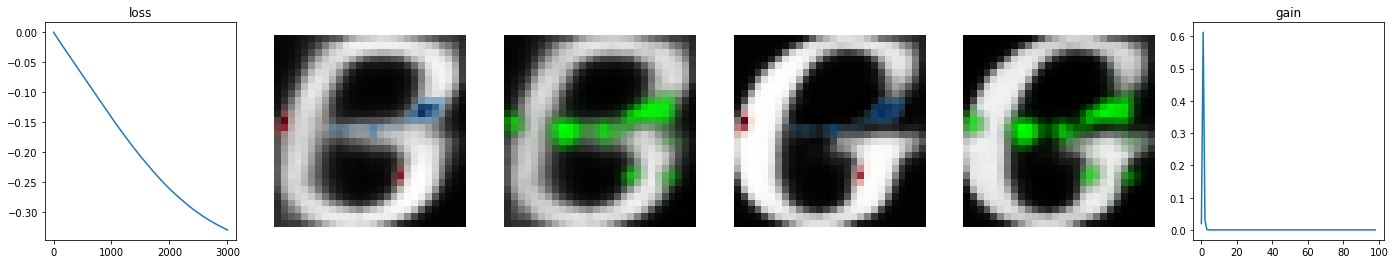

In [16]:
idx = 11356 # (G to B)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    semantic_morphing_max_iters=5000, semantic_morphing_alpha_lk=10.,
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

6690


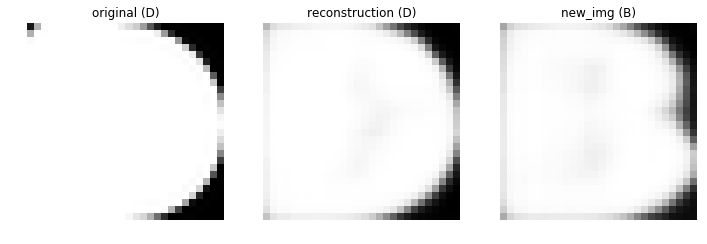

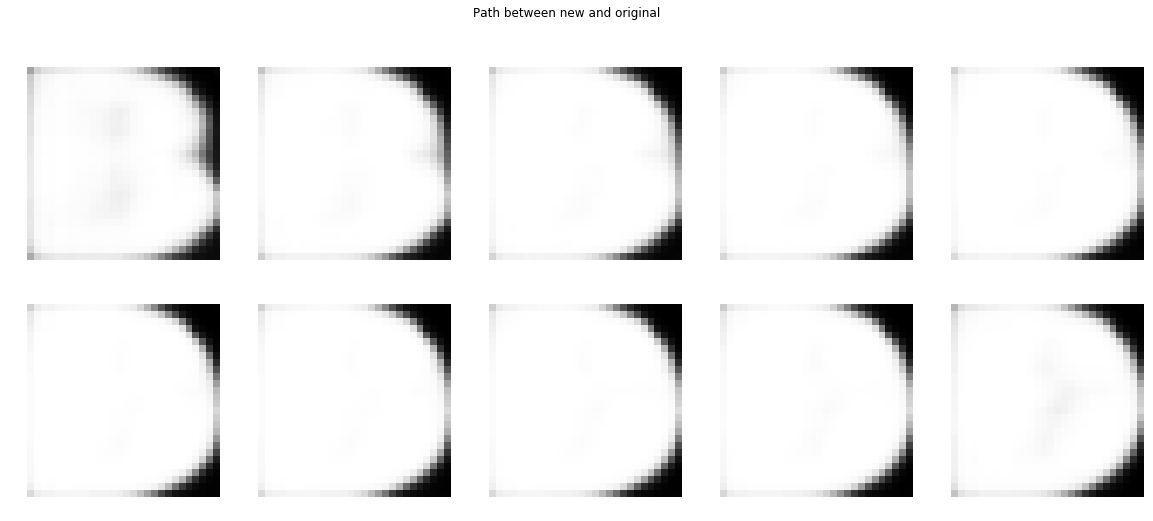

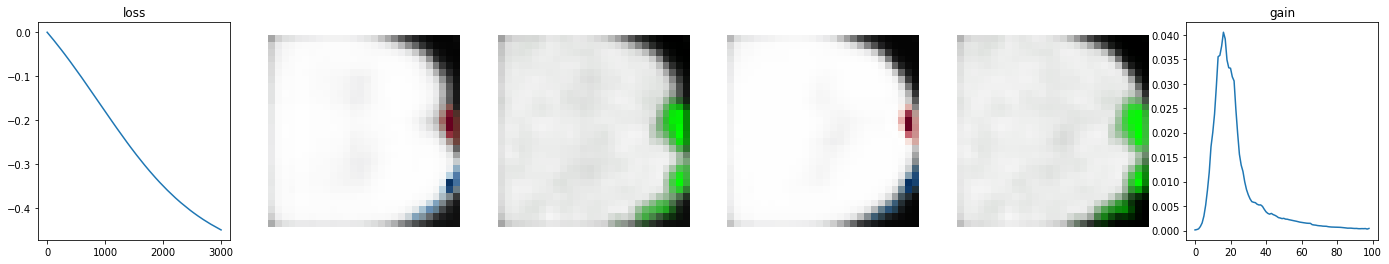

In [18]:
idx = np.random.choice(dataset.train)
#idx = 11877 # (G to H)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    semantic_morphing_max_iters=5000, semantic_morphing_alpha_lk=10.,
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

3171


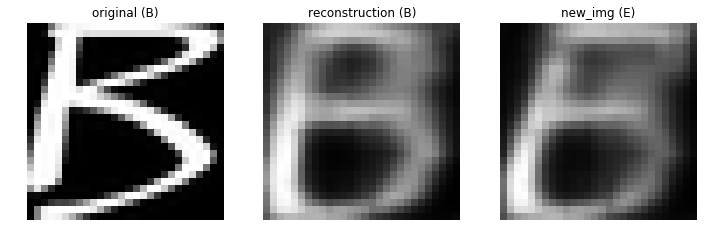

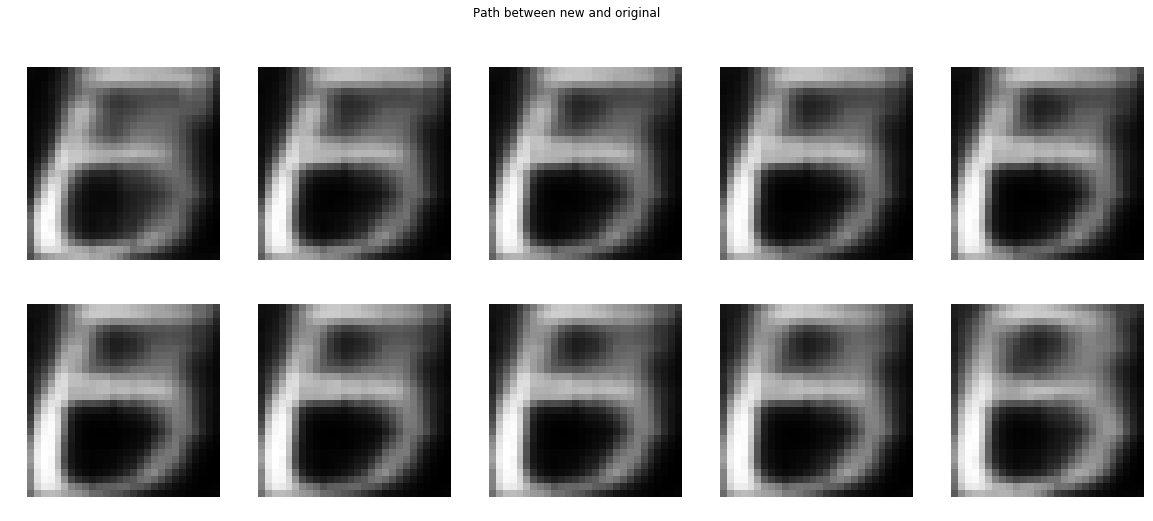

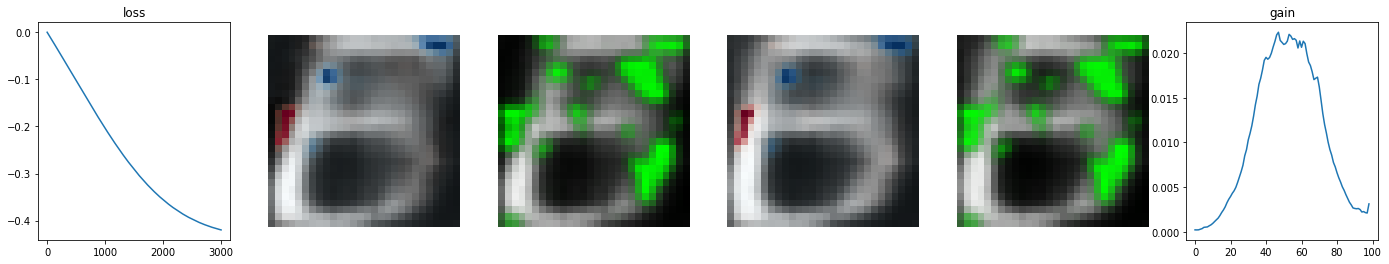

In [15]:
idx = np.random.choice(dataset.train)
#idx = 11877 # (G to H)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    semantic_morphing_max_iters=5000, semantic_morphing_alpha_lk=10.,
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

# Experiments with wrongly predicted inputs

In [19]:
preds = []
labels = []

with torch.no_grad():
    for idx in dataset.test:
        X, y, _ = dataset[idx]
        X = X.to(device)
        preds.append(model(X.unsqueeze(0)).argmax(dim=1))
        labels.append(y)
        
preds = torch.cat(preds)
labels = torch.Tensor(labels).to(device)

err_idx = dataset.test[
    (labels.long() != preds).nonzero().squeeze().cpu().detach().numpy()
]

4050


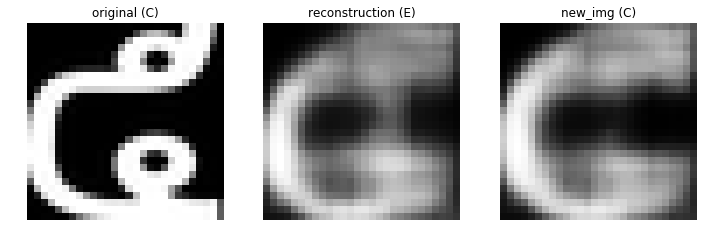

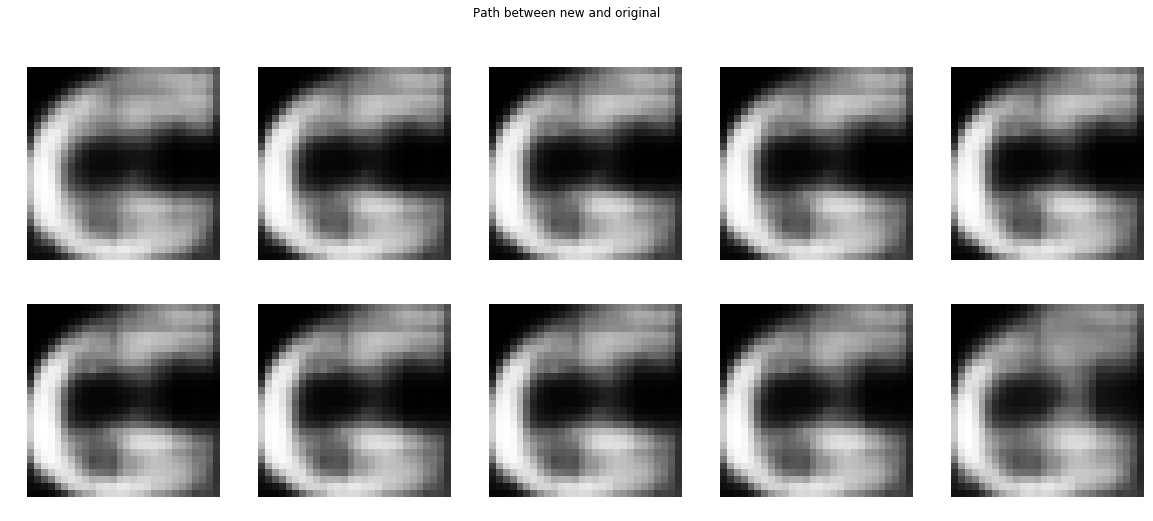

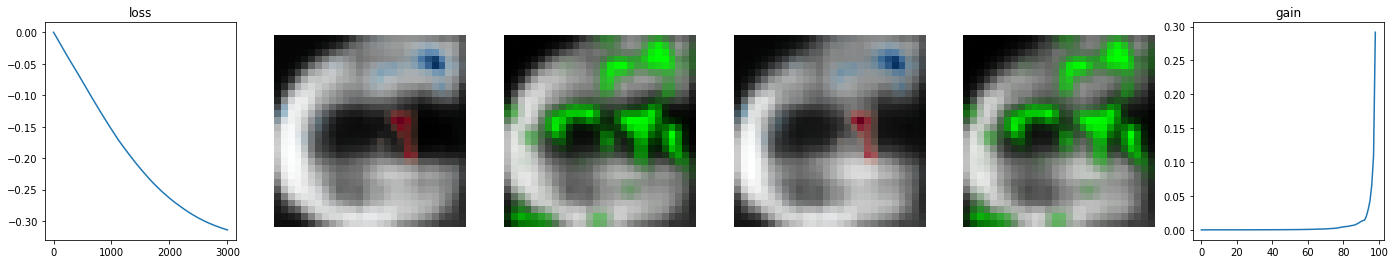

In [20]:
idx = np.random.choice(err_idx)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

4389


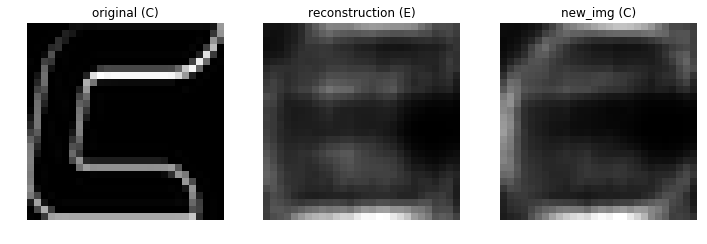

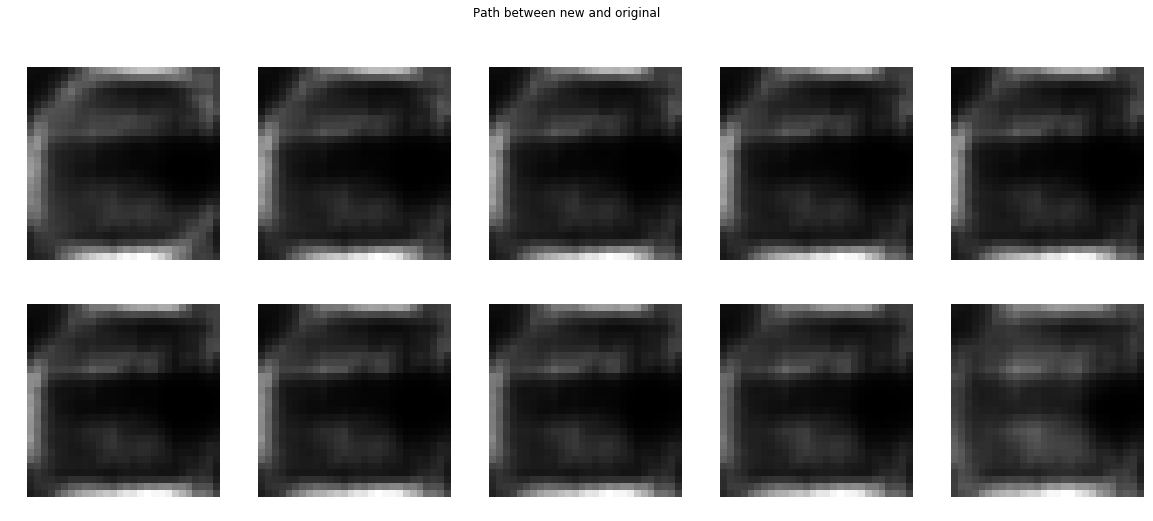

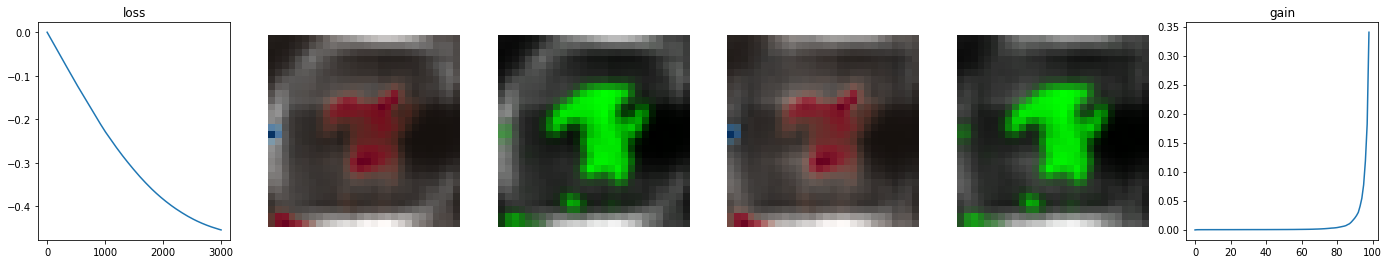

In [22]:
idx = np.random.choice(err_idx)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

11022


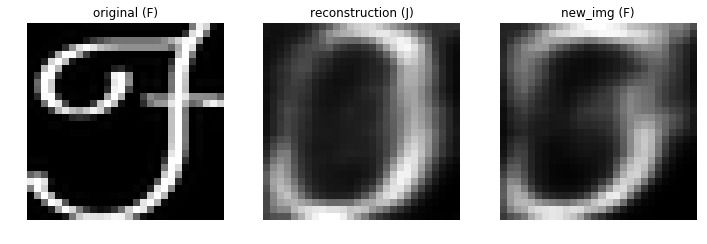

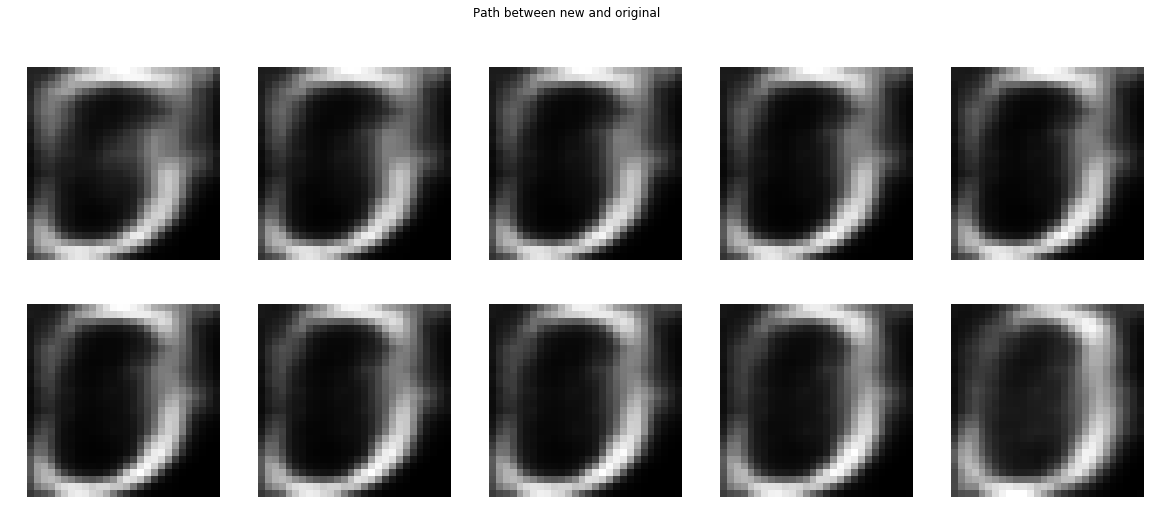

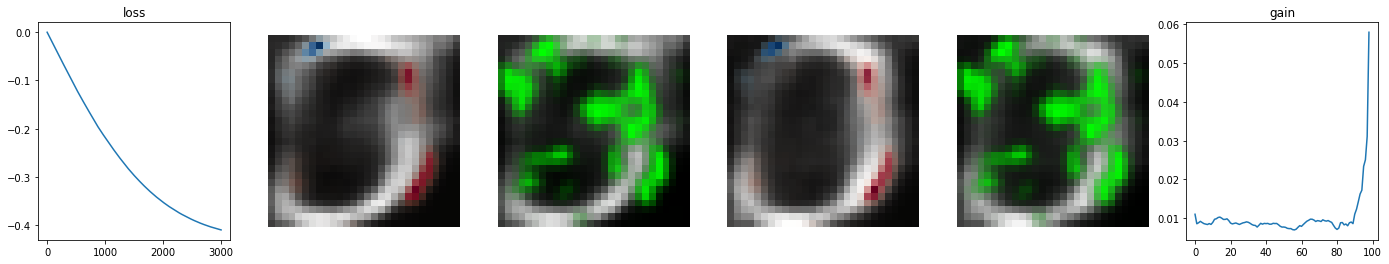

In [28]:
idx = np.random.choice(err_idx)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)